In [1]:
from src.pre_procesamiento.transformar_datos_para_modelos import (
  filtrar_datos_train_test_para_modelos,
  VARS_CATEGORICAS
)

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
datos_train, datos_test = filtrar_datos_train_test_para_modelos()
datos = pd.concat([datos_train, datos_test], ignore_index = True)
datos

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45218,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45219,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45220,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
"""
Para el modelo de bosque aleatorio, no es necesario realizar
one-hot encoding de las variables categóricas.

Sin embargo, por cuestiones de la librería usada para trabajar con
tal modelo, se requiere convertir en valores numéricos a los 
valores de cada variable categórica.
"""
le = LabelEncoder()
datos_encoded = datos.copy()
for var_cat in VARS_CATEGORICAS:
  datos_encoded[var_cat] = le.fit_transform(datos[var_cat])

datos_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,2,245211,9,13,4,9,3,4,1,0,0,40,38,0
45218,39,2,215419,9,13,0,9,1,4,0,0,0,36,38,0
45219,38,2,374983,9,13,2,9,0,4,1,0,0,50,38,0
45220,44,2,83891,9,13,0,0,3,1,1,5455,0,40,38,0


In [4]:
datos_train_encoded = datos_encoded.iloc[0:datos_train.shape[0]]
datos_test_encoded = datos_encoded.iloc[datos_train.shape[0]:]

datos_train_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
30158,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
30159,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
30160,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [5]:
nombre_variable_target = 'class'

X_train, X_test, y_train, y_test = [
  datos_train_encoded.drop([nombre_variable_target], axis = 1).values,
  datos_test_encoded.drop([nombre_variable_target], axis = 1).values,
  datos_train_encoded[nombre_variable_target],
  datos_test_encoded[nombre_variable_target]
]

In [6]:
modelo = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
print(f'Exactitud del modelo: {round(100 * modelo.score(X_test, y_test), 2)}%')

print('\nCantidades en la variable por predecir:')
print(y_test.value_counts())

# Matríz de confusión
confusion_matrix(y_test, modelo.predict(X_test), labels = [1, 0])

Exactitud del modelo: 84.97%

Cantidades en la variable por predecir:
class
0    11360
1     3700
Name: count, dtype: int64


array([[ 2270,  1430],
       [  834, 10526]], dtype=int64)

Text(0.5, 0, 'Importancia de los predictores en el modelo')

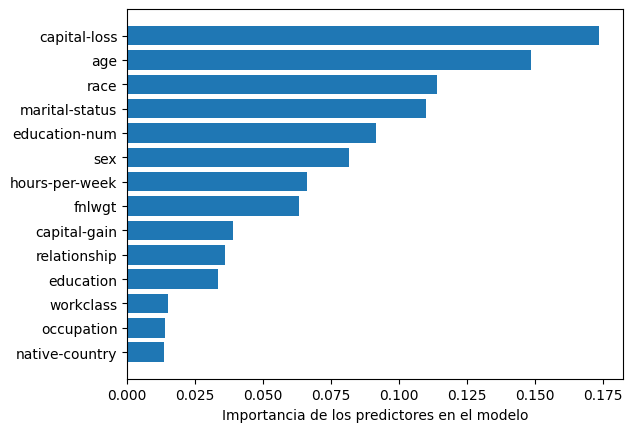

In [7]:
"""
Comparar qué predictores tienen mayor efecto sobre la variable objetivo, 'class'
"""
sorted_idx = modelo.feature_importances_.argsort()

plt.barh(
  datos_train_encoded.columns.difference([nombre_variable_target])[sorted_idx],
  modelo.feature_importances_[sorted_idx]
)
plt.xlabel("Importancia de los predictores en el modelo")